In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
#한글 깨짐 현상 방지 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

#한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [17]:
# 데이터 불러오기
df1 = pd.read_csv('/content/drive/MyDrive/2023/코로나/인천광역시_인구_2020~2021.csv',encoding = "euc-kr", engine='python')
df2 = pd.read_csv('/content/drive/MyDrive/2023/코로나/인천광역시_코로나.csv',encoding = "euc-kr", engine='python')

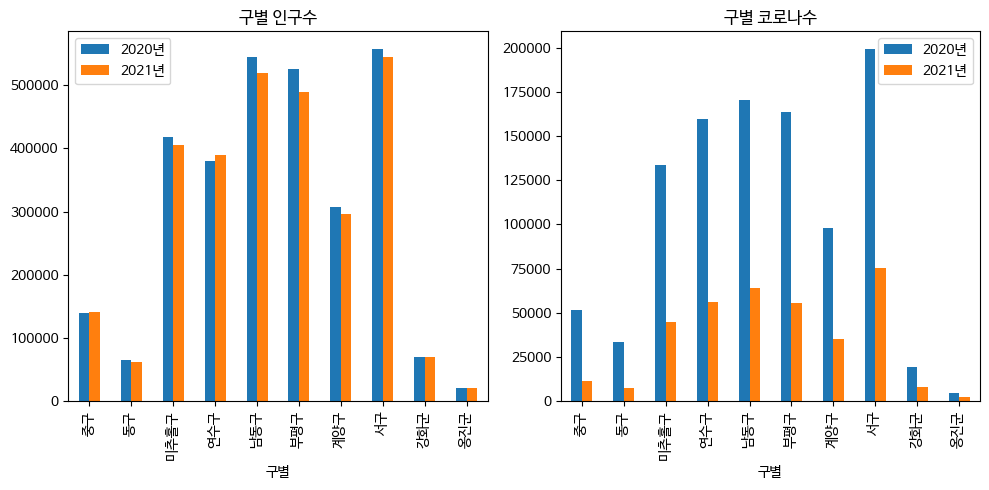

In [18]:
# 지역을 인덱스로 설정
df1.set_index('구별', inplace=True)
df2.set_index('구별', inplace=True)

# 그래프 그리기
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df1.plot(kind='bar', ax=ax[0])
df2.plot(kind='bar', ax=ax[1])
ax[0].set_title('구별 인구수')
ax[1].set_title('구별 코로나수')
plt.tight_layout()
plt.show()

In [19]:
from matplotlib.cm import datad
# 데이터 합치기
data = pd.merge(df1, df2, on='구별',how='left')

data

2020년_x  2021년_x  2020년_y  2021년_y
구별                                      
중구     139385   141341    51758    11188
동구      65362    62410    33767     7390
미추홀구   418494   405811   133750    44818
연수구    379727   390107   159758    55899
남동구    545131   519667   170238    64192
부평구    526126   489178   163812    55808
계양구    306817   295492    97760    35299
서구     557415   544726   199313    75268
강화군     70037    69324    19316     7825
옹진군     20791    20373     4651     2421

In [20]:
# 인구수을 내림차순으로 정렬
data = data.sort_values(by='2020년_x', ascending=False)

data

2020년_x  2021년_x  2020년_y  2021년_y
구별                                      
서구     557415   544726   199313    75268
남동구    545131   519667   170238    64192
부평구    526126   489178   163812    55808
미추홀구   418494   405811   133750    44818
연수구    379727   390107   159758    55899
계양구    306817   295492    97760    35299
중구     139385   141341    51758    11188
강화군     70037    69324    19316     7825
동구      65362    62410    33767     7390
옹진군     20791    20373     4651     2421

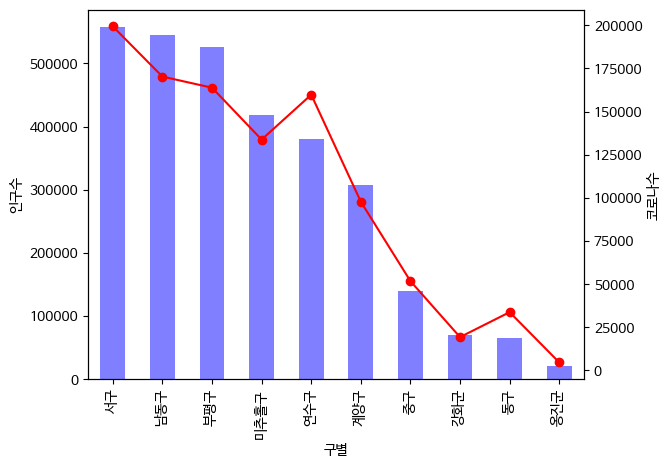

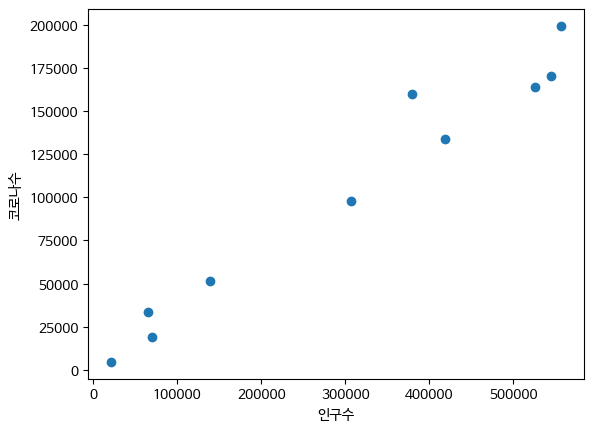

In [21]:
# 비교 그래프 그리기 - 2020년
fig, ax = plt.subplots()
ax2 = ax.twinx()

data.plot(kind='bar', y='2020년_x', ax=ax, color='blue', alpha=0.5, legend=False)
data.plot(kind='line', y='2020년_y', ax=ax2, color='red', marker='o', legend=False)

ax.set_ylabel('인구수')
ax2.set_ylabel('코로나수')

plt.show()

# 산점도 그리기
plt.scatter(data['2020년_x'], data['2020년_y'])
plt.xlabel('인구수')
plt.ylabel('코로나수')
plt.show()

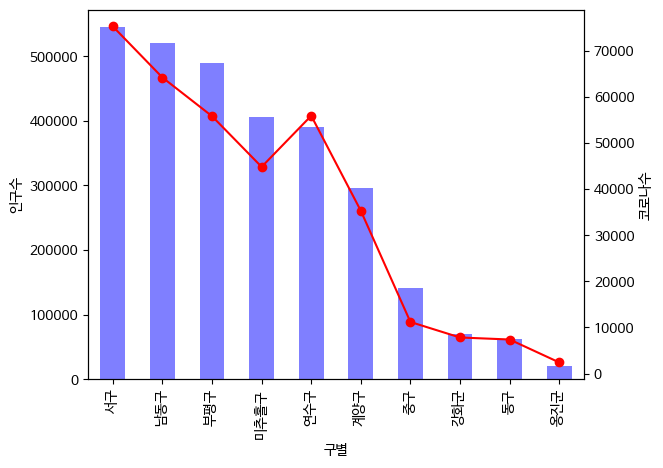

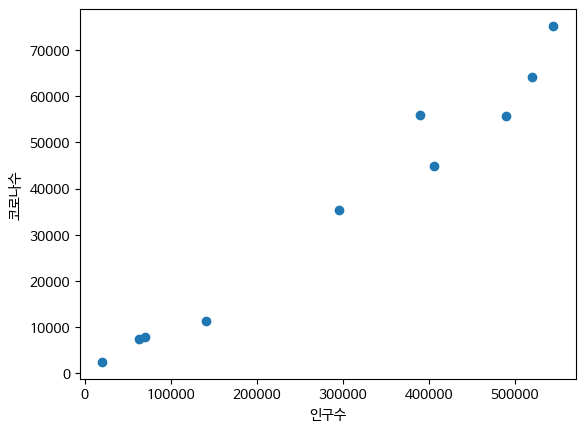

In [23]:
# 비교 그래프 그리기 - 2021년
fig, ax = plt.subplots()
ax2 = ax.twinx()

data.plot(kind='bar', y='2021년_x', ax=ax, color='blue', alpha=0.5, legend=False)
data.plot(kind='line', y='2021년_y', ax=ax2, color='red', marker='o', legend=False)

ax.set_ylabel('인구수')
ax2.set_ylabel('코로나수')

plt.show()

# 산점도 그리기
plt.scatter(data['2021년_x'], data['2021년_y'])
plt.xlabel('인구수')
plt.ylabel('코로나수')
plt.show()

In [24]:
# 산점도 그리기

plt.scatter(data['2020년_x'], data['2020년_y'], color = 'green')
plt.scatter(data['2021년_x'], data['2021년_y'], color = 'yellow')

plt.xlabel('인구수')
plt.ylabel('코로나수')
plt.show()

In [25]:
# 상관계수 계산 - 2020년
corr = data['2020년_x'].corr(data['2020년_y'])
print(f"코로나수와 인구수 간의 상관계수: {corr:.3f}")

코로나수와 인구수 간의 상관계수: 0.981


In [26]:
# 상관계수 계산 - 2021년
corr = data['2021년_x'].corr(data['2021년_y'])
print(f"코로나와 인구수 간의 상관계수: {corr:3f}")

코로나와 인구수 간의 상관계수: 0.984862


In [13]:
# 데이터 불러오기
df1 = pd.read_csv('/content/drive/MyDrive/2023/코로나/인천광역시_코로나.csv', encoding='CP949')
df2 = pd.read_csv('/content/drive/MyDrive/2023/코로나/인천광역시_인구_2020~2021.csv', encoding='CP949')

# 데이터 합치기
merged_df = pd.merge(df1, df2, on='구별')

# 상관관계 분석
correlation = merged_df[['구별','2020년_x', '2021년_x', '2020년_y', '2021년_y']].corr()

# 상관계수 출력
print(correlation)

          2020년_x   2021년_x   2020년_y   2021년_y
2020년_x  1.000000  0.992506  0.980989  0.988243
2021년_x  0.992506  1.000000  0.977804  0.984862
2020년_y  0.980989  0.977804  1.000000  0.998676
2021년_y  0.988243  0.984862  0.998676  1.000000


<ipython-input-13-d6def6352e34>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = merged_df[['구별','2020년_x', '2021년_x', '2020년_y', '2021년_y']].corr()
